In [1]:
import numpy as np
import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3-D example.

Everything works in N-D except for the plots.

In [2]:
def rr():
    
        
    _a= [np.random.multivariate_normal([-5,5,5],[[0.12,0,0],[0,0.12,0],[0,0,0.12]]),\
         np.random.multivariate_normal([-1,1,1],[[0.05,0,0],[0,0.1,0],[0,0,0.02]]),\
         np.random.multivariate_normal([-5,1,5],[[0.12,0,0],[0,0.12,0],[0,0,0.01]]),\
         np.random.multivariate_normal([-5,5,1],[[0.12,0,0],[0,0.12,0],[0,0,0.2]]),\
         np.random.multivariate_normal([-1,3,5],[[0.12,0,0],[0,0.12,0],[0,0,0.12]])]
    
    _i=np.random.choice(np.arange(len(_a)))
    
    return _a[_i]

dim=3
data=np.array([ rr() for i in np.arange(300)])

<IPython.core.display.Javascript object>


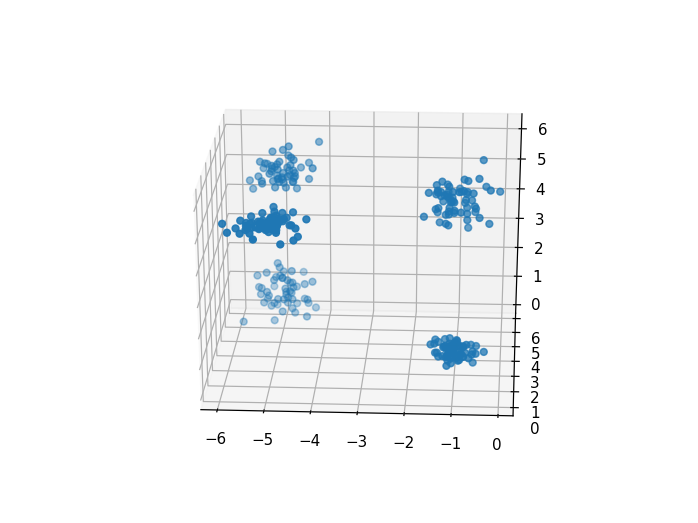

In [3]:
if  True:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0],data[:,1],data[:,2])  #plot the centroids
    plt.show()

In [4]:
def dist(r1,r2,_dim=dim):
    return np.sum([(r1[i]-r2[i])**2 for i in xrange(_dim)])
    


def cluster_avg(centers,_dim=dim):
    return [ np.mean([i[j] for i in centers]) for j in xrange(_dim)  ]
    
def dist_to_closest(data,centers):

    for i,c in enumerate(centers):
        _tmp=dist(data,c)
        if i==0:
            arg_min=i
            min_dist=_tmp
        
        if _tmp<min_dist:
            arg_min=i
            min_dist=_tmp
            
        if _tmp==min_dist:

            arg_min=np.random.choice([i,arg_min])
            min_dist=np.random.choice([_tmp,min_dist])
    return arg_min, min_dist

<IPython.core.display.Javascript object>


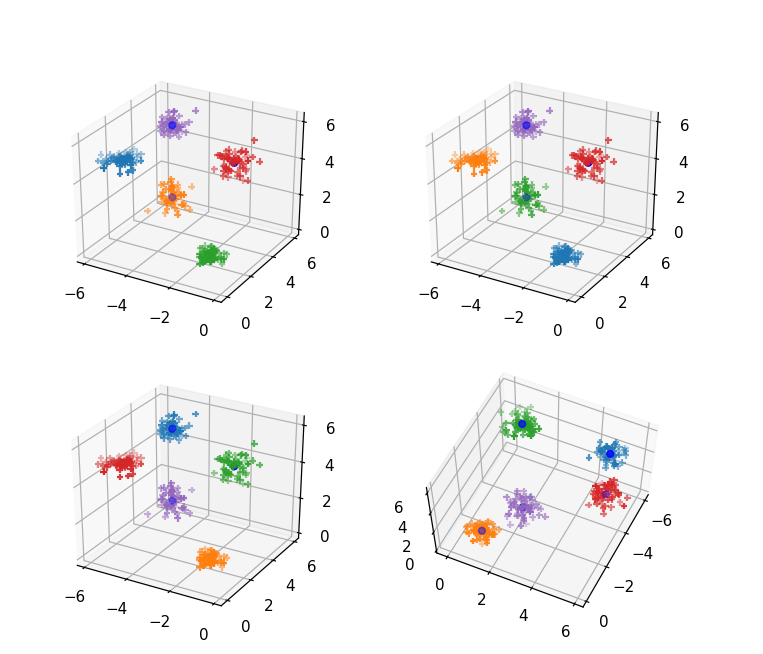

In [13]:
def dist(r1,r2,_dim=dim):
    return np.sum([(r1[i]-r2[i])**2 for i in xrange(_dim)])
    


def cluster_avg(centers,_dim=dim):
    return [ np.mean([i[j] for i in centers]) for j in xrange(_dim)  ]
    
def dist_to_closest(data,centers):

    for i,c in enumerate(centers):
        _tmp=dist(data,c)
        if i==0:
            arg_min=i
            min_dist=_tmp
        
        if _tmp<min_dist:
            arg_min=i
            min_dist=_tmp
            
        if _tmp==min_dist:

            arg_min=np.random.choice([i,arg_min])
            min_dist=np.random.choice([_tmp,min_dist])
    return arg_min, min_dist

fig=plt.figure(figsize=(7,6))
fig.subplots_adjust(bottom=0.05, left=0.05, top = 0.9, right=0.9)
#=============================================================================#


_k=5
ldata=len(data)

#Number o iterations
iterations=50
#run it multiple times
runs=4
for run in range(runs):

    #==========initialize the centers (k++ init)==========#
    init_index=np.random.randint(ldata)#choose a point at random as one cluster center
    centers=[  ]
    centers.append(data[init_index])

    for i in np.arange(_k-1):

        dists=np.array([])
        for j,d in enumerate(data):#find the distances for each point to the closest center
            dists=np.append(dists, dist_to_closest(d,centers)[1])

        probs=dists/np.sum(dists)#normalize dists, so that they represent probabilities

        rand_index=np.nonzero(np.random.multinomial(1,probs))[0][0]
        centers.append(data[rand_index])

    #==========run k-means==========#
    _iter=0
    while _iter<=iterations:#run k-means
        clusters=[[] for i in np.arange(_k)] 
        for i in np.arange(ldata):
            #calculate distances
            _tmp= np.array( [dist( centers[c] , data[i] ) for c in np.arange( _k ) ] ) 
            #find the index of the closest centroid
            _min=_tmp.argmin() 
            #make clusters
            clusters[_min].append( data[i] )

        for i in np.arange(_k):
            _tmp=cluster_avg(clusters[i])
            centers[i]=[_tmp[_d] for _d in xrange(dim)]


        _iter+=1
        


    sub = fig.add_subplot(runs/2,2,run+1, projection='3d')
    for i in np.arange(_k):
        sub.scatter(np.array(clusters[i])[:,0],np.array(clusters[i])[:,1],np.array(clusters[i])[:,2],marker='+')

    sub.scatter(np.array(centers)[:,0],np.array(centers)[:,1],np.array(centers)[:,2],c='b')    


plt.show()